In [ ]:
# 2024-02
# Unicursal stars
# cf. https://oeis.org/A370459

In [44]:
from collections import defaultdict
import time

In [101]:
class CyclicTuple:
    # permutation tuples modulo dihedral group
    def __init__(self, *args):
        self._tuple = tuple(args)
        self._len = len(self._tuple)
        assert tuple(range(self._len)) == tuple(sorted(self._tuple)), "Tuple must be a permutation"
        # store differences between elements
        self._diffs = tuple((self._tuple[i] - self._tuple[i-1]) % self._len for i in range(self._len))
    
    def __getitem__(self, key):
        return self._tuple[key % self._len]
    
    def __len__(self):
        return self._len
    
    def __repr__(self):
        return f"CyclicTuple{self._tuple}"
    
    def __order__(self):
        # order of symmetry group
        diffs = self._diffs
        neg_diffs = tuple(-d % self._len for d in diffs)
        rev_diffs = tuple(reversed(diffs))
        rev_neg_diffs = tuple(reversed(neg_diffs))
        all_diffs = [diffs, neg_diffs, rev_diffs, rev_neg_diffs]
        # now cyclically rotate to find the lexicographically smallest
        same = 0
        for i in range(self._len):
            for j in range(4):
                all_diffs[j] = tuple(all_diffs[j][-1:] + all_diffs[j][:-1])
                if all_diffs[j] == diffs:
                    same += 1
        return same

    
    def __hash__(self) -> int:
        # canonicalize by diffs modulo dihedral group
        # first find (diffs, negated diffs, reversed diffs, reversed negated diffs)
        diffs = self._diffs
        neg_diffs = tuple(-d % self._len for d in diffs)
        rev_diffs = tuple(reversed(diffs))
        rev_neg_diffs = tuple(reversed(neg_diffs))
        all_diffs = [diffs, rev_neg_diffs] # [diffs, neg_diffs, rev_diffs, rev_neg_diffs]
        # now cyclically rotate to find the lexicographically smallest
        min_diffs = diffs
        for i in range(self._len):
            for j in range(len(all_diffs)):
                all_diffs[j] = tuple(all_diffs[j][-1:] + all_diffs[j][:-1])
                if all_diffs[j] < min_diffs:
                    min_diffs = all_diffs[j]
        return hash(min_diffs)

    
    def __eq__(self, other):
        return hash(self) == hash(other)

In [2]:
def legit(N, i, j):
    return (i - j) % N not in [1, N - 1]

def all_paths(path, nodes_left):
    N = len(path) + len(nodes_left)
    if len(nodes_left) == 0 and legit(N, path[0], path[-1]):
        return {CyclicTuple(*path)}
    else:
        last = path[-1]
        return set().union(*[
            all_paths(path+[node], nodes_left.difference({node}))
            for node in nodes_left if legit(N, last, node)
            ])

In [102]:
paths_by_size_by_order = defaultdict(lambda: defaultdict(set))
start_time = time.time()
for k in range(13):
    for path in all_paths([0], {*range(1, k)}):
        paths_by_size_by_order[k][path.__order__()].add(path)
    print(f"Finished {k} in {time.time() - start_time} seconds")
    tot = 0
    for s in paths_by_size_by_order[k]:
        print(s, len(paths_by_size_by_order[k][s]))
        tot += len(paths_by_size_by_order[k][s])
    print(tot)
    start_time = time.time()

Finished 0 in 0.0003368854522705078 seconds
0
Finished 1 in 1.2874603271484375e-05 seconds
0
Finished 2 in 8.344650268554688e-06 seconds
0
Finished 3 in 6.4373016357421875e-06 seconds
0
Finished 4 in 1.430511474609375e-05 seconds
0
Finished 5 in 0.0002193450927734375 seconds
10 1
1
Finished 6 in 0.0006103515625 seconds
4 1
1
Finished 7 in 0.003435373306274414 seconds
2 3
14 2
5
Finished 8 in 0.04423046112060547 seconds
4 4
1 12
16 1
2 10
27
Finished 9 in 0.3555333614349365 seconds
1 126
6 1
2 46
18 2
175
Finished 10 in 3.5645463466644287 seconds
1 1354
2 163
4 14
20 1
10 1
1533
Finished 11 in 42.8188271522522 seconds
1 13840
2 517
22 4
14361
Finished 12 in 504.72883129119873 seconds
1 149334
2 2156
4 67
6 6
24 1
3 8
8 2
12 1
151575


In [60]:
type(sorted(paths_by_size_by_order[9].keys()))

list

In [70]:
max = np.max

In [81]:
paths_by_size_by_order[6]

defaultdict(set, {4: {CyclicTuple(0, 2, 4, 1, 5, 3)}, 12: set()})

In [92]:
len(paths_by_size_by_order[12][6])

6

In [94]:
bests = []
maxes = set()
for k in range(3, 13):
    print()
    symms = sorted(paths_by_size_by_order[k].keys())
    for s in symms:
        print(k, s, len(paths_by_size_by_order[k][s]))
    high_s = [s for s in symms if 2 < s < 2 * k]
    for s in high_s:
        curr = paths_by_size_by_order[k][s]
        if len(curr) < 10:
            bests += list(curr)
            print(f"*{k}, {s}, {len(curr)} paths")
    # if len(high_s) > 0:
    #     high_symm = [path for s in high_s for path in paths_by_size_by_order[k][s]]
    #     #draw_paths(high_symm)
    #     maxs = max(high_s)
    #     if maxs >= k/2:
    #         maxes.add(maxs)
    #         bests += list(paths_by_size_by_order[k][maxs])
    #         print(f"Best for {k} is {maxs}")




5 10 1

6 4 1
6 12 0
*6, 4, 1 paths

7 2 3
7 14 2

8 1 6
8 2 8
8 4 4
8 12 0
8 16 1
*8, 4, 4 paths
*8, 12, 0 paths

9 1 63
9 2 46
9 6 1
9 12 0
9 18 2
*9, 6, 1 paths
*9, 12, 0 paths

10 1 677
10 2 135
10 4 14
10 10 1
10 12 0
10 20 1
*10, 10, 1 paths
*10, 12, 0 paths

11 1 6920
11 2 517
11 22 4

12 1 74667
12 2 1832
12 3 4
12 4 66
12 6 6
12 8 2
12 12 1
12 24 1
*12, 3, 4 paths
*12, 6, 6 paths
*12, 8, 2 paths
*12, 12, 1 paths


In [95]:
bests

[CyclicTuple(0, 2, 4, 1, 5, 3),
 CyclicTuple(0, 3, 6, 1, 5, 2, 7, 4),
 CyclicTuple(0, 2, 5, 7, 4, 6, 1, 3),
 CyclicTuple(0, 2, 6, 4, 7, 5, 1, 3),
 CyclicTuple(0, 2, 5, 7, 3, 1, 6, 4),
 CyclicTuple(0, 2, 7, 3, 5, 1, 6, 8, 4),
 CyclicTuple(0, 3, 8, 1, 6, 9, 4, 7, 2, 5),
 CyclicTuple(0, 2, 5, 11, 8, 10, 1, 7, 4, 6, 9, 3),
 CyclicTuple(0, 2, 7, 1, 8, 10, 3, 9, 4, 6, 11, 5),
 CyclicTuple(0, 2, 5, 3, 8, 10, 1, 11, 4, 6, 9, 7),
 CyclicTuple(0, 2, 5, 11, 4, 6, 9, 3, 8, 10, 1, 7),
 CyclicTuple(0, 3, 6, 1, 8, 11, 2, 9, 4, 7, 10, 5),
 CyclicTuple(0, 3, 6, 1, 4, 7, 10, 5, 8, 11, 2, 9),
 CyclicTuple(0, 3, 9, 2, 8, 11, 5, 10, 4, 7, 1, 6),
 CyclicTuple(0, 2, 9, 11, 8, 10, 5, 7, 4, 6, 1, 3),
 CyclicTuple(0, 2, 7, 9, 4, 6, 11, 1, 8, 10, 3, 5),
 CyclicTuple(0, 2, 5, 7, 4, 6, 9, 11, 8, 10, 1, 3),
 CyclicTuple(0, 2, 4, 9, 11, 1, 6, 8, 10, 3, 5, 7),
 CyclicTuple(0, 4, 8, 3, 7, 11, 6, 10, 2, 9, 1, 5),
 CyclicTuple(0, 3, 10, 1, 8, 11, 6, 9, 4, 7, 2, 5)]

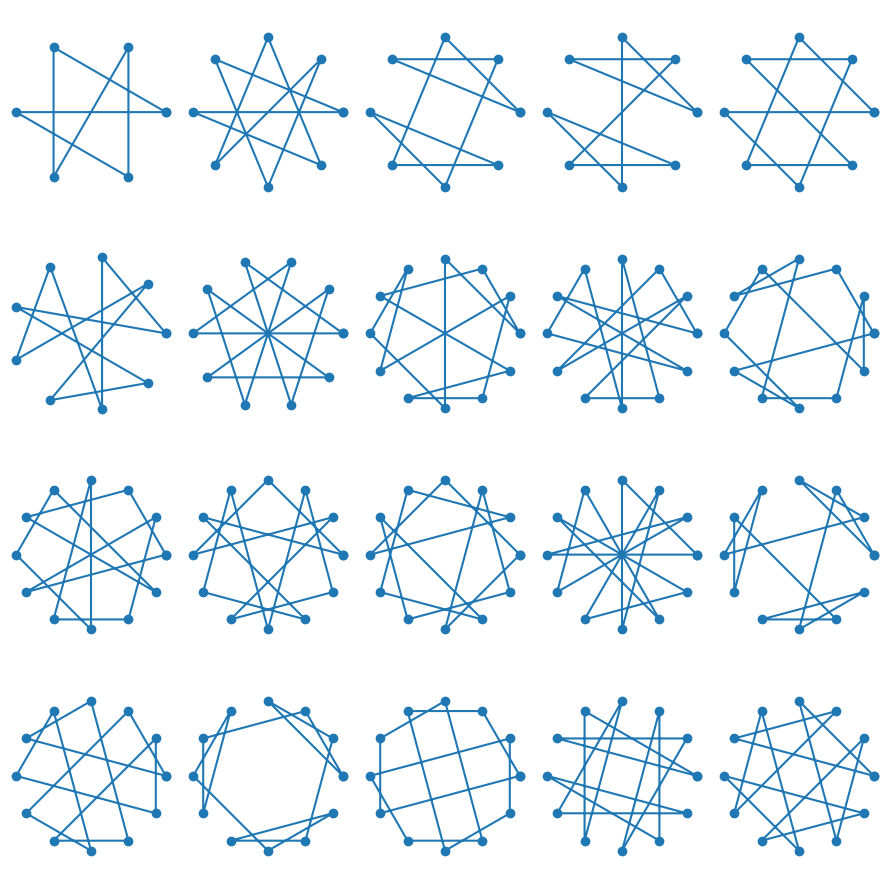

In [96]:
draw_paths(bests)

In [73]:
# draw the paths on a circle
import matplotlib.pyplot as plt
import numpy as np

def draw_paths(paths):
    # calculate the number of rows and columns for the grid
    num_plots = len(paths)
    num_cols = int(np.ceil(np.sqrt(num_plots)))
    num_rows = int(np.ceil(num_plots / num_cols))
    
    # create the grid of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, 9))

    # turn off the axes for all subplots and decrease the padding
    if num_plots == 1:
        axs = np.array([[axs]])
    if num_plots == 2:
        axs = np.array([axs])
    for ax in axs.flatten():
        ax.axis('off')
    
    # iterate over the paths and plot them in the subplots
    for i, path in enumerate(paths):
        # calculate the row and column index for the current subplot
        row = i // num_cols
        col = i % num_cols
        
        # calculate the x and y coordinates for the current path
        N = len(path)
        x = [np.cos(2*np.pi*i/N) for i in path._tuple + (path[0],)]
        y = [np.sin(2*np.pi*i/N) for i in path._tuple + (path[0],)]
        
        # plot the path in the current subplot
        axs[row, col].plot(x, y)
        axs[row, col].scatter(x, y)
        axs[row, col].axis('equal')
    
    # adjust the spacing between subplots
    plt.tight_layout()
    
    # show the grid of subplots
    plt.show()


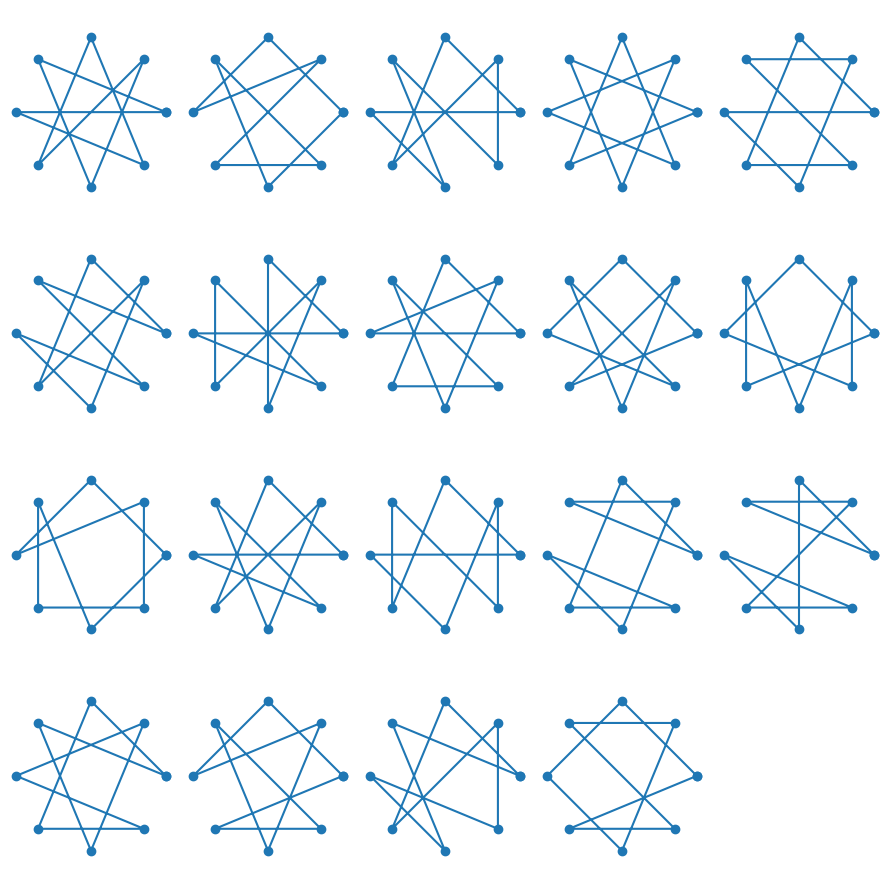

In [97]:

# call the modified function with the paths
paths = all_paths([0], {*range(1, 8)})
draw_paths(paths)